In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import datetime
import project1_functions as pf
from project1_functions import concat_dfs

In [42]:
# our_dates = """Saturday, September 07, 2019
# Saturday, September 29, 2018
# Saturday, September 30, 2017"""

In [47]:
# def month_to_num(date_list):
#     date_list = date_list.split()
#     month = date_list[0].lower()
#     day = date_list[1]
#     year = date_list[2][2::]
#     month_dict =  {
#                    'january' : '01',
#                    'february' : '02',
#                    'march' : '03',
#                    'april' : '04',
#                    'may' : '05',
#                    'june' : '06',
#                    'july' : '07',
#                    'august' : '08',
#                    'september' : '09', 
#                    'october' : '10',
#                    'november' : '11',
#                    'december' : '12'
#                     }
#     return year + month_dict[month] + day
# def get_data_sets(url_list):
#     dfs = []
#     for char in url_list:
#         url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'.format(char)
#         dfs.append(pd.read_csv(url))
#     return dfs
# formatted_dates = list(our_dates.replace('Saturday, ','').replace(',','').split('\n'))
# url_list = [month_to_num(date) for date in formatted_dates]
# dfs = get_data_sets(url_list)

In [49]:
# from clean_data import clean_data
# clean_dfs = []
# for df in dfs:
#     clean_dfs.append(clean_data(df))


In [6]:
# df_sorted = pf.concat_dfs(clean_dfs)

In [7]:
# df_full = pf.get_boroughs(df_sorted)

In [ ]:
df_full = pd.read_csv('final_data.csv')

<IPython.core.display.Javascript object>


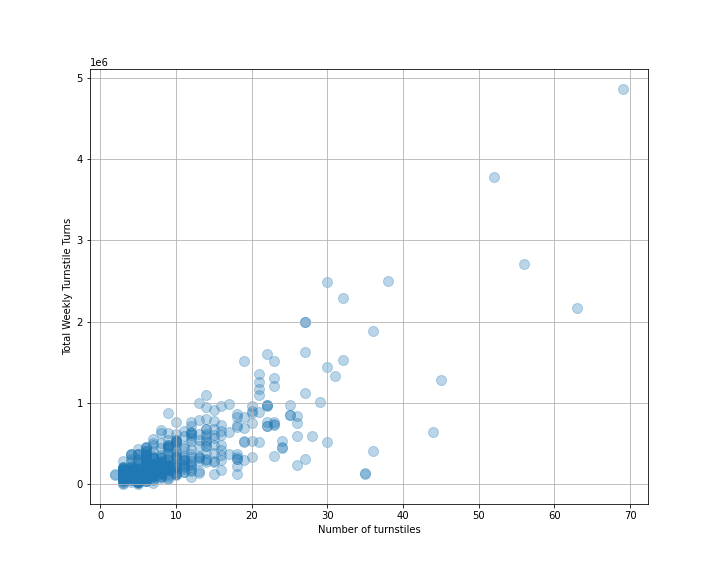

In [5]:
df_full = df_full[df_full['entries_diff'] < 92000]
pf.plot_total_traffic_by_station(df_full, metric='total_turns', borough=False)
#'Total Weekly Turnstile Turns Per # of Turnstiles, September 2017/2018/2019'

<IPython.core.display.Javascript object>


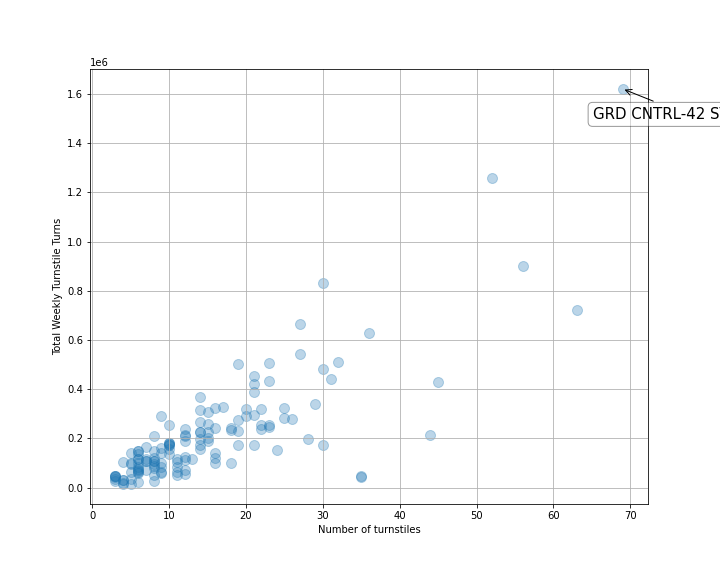

In [74]:
pf.plot_total_traffic_by_station(df_full, metric='weekly_turns', borough='Manhattan')


<IPython.core.display.Javascript object>


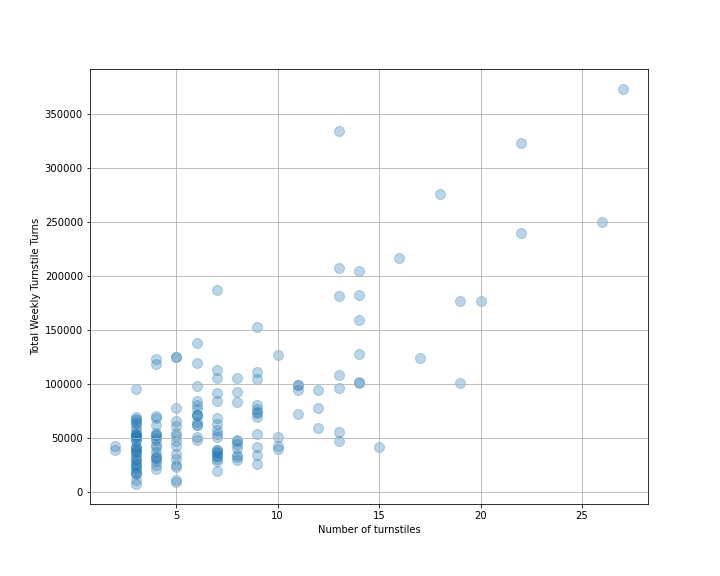

In [75]:
pf.plot_total_traffic_by_station(df_full, metric='weekly_turns', borough='Brooklyn')

<IPython.core.display.Javascript object>


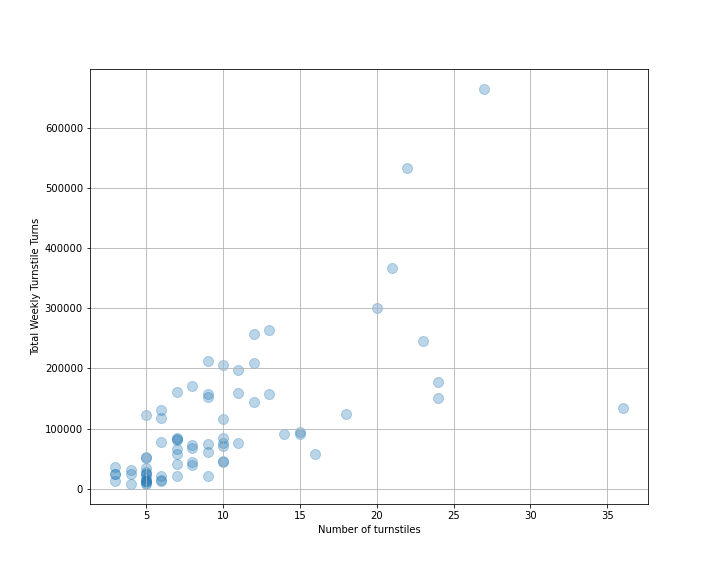

In [76]:
pf.plot_total_traffic_by_station(df_full, metric='weekly_turns', borough='Queens')

<IPython.core.display.Javascript object>


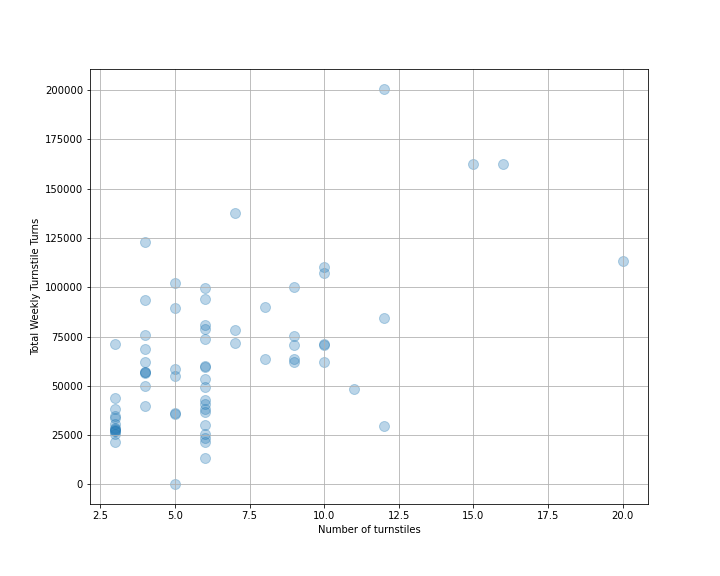

In [77]:
pf.plot_total_traffic_by_station(df_full, metric='weekly_turns', borough='The Bronx')


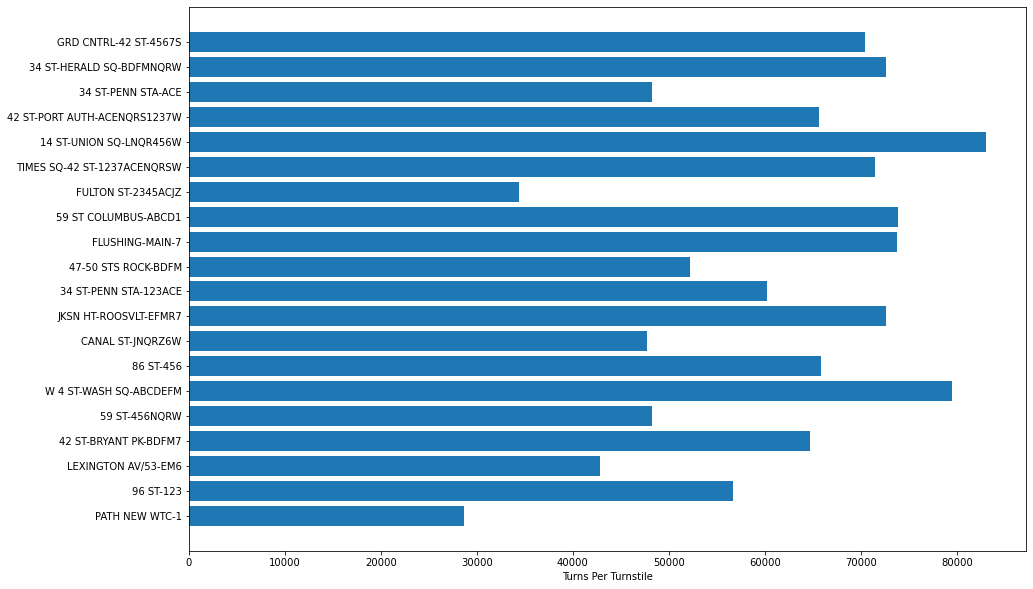

In [79]:
pf.plot_traffic_density(df_full, stations = 20)

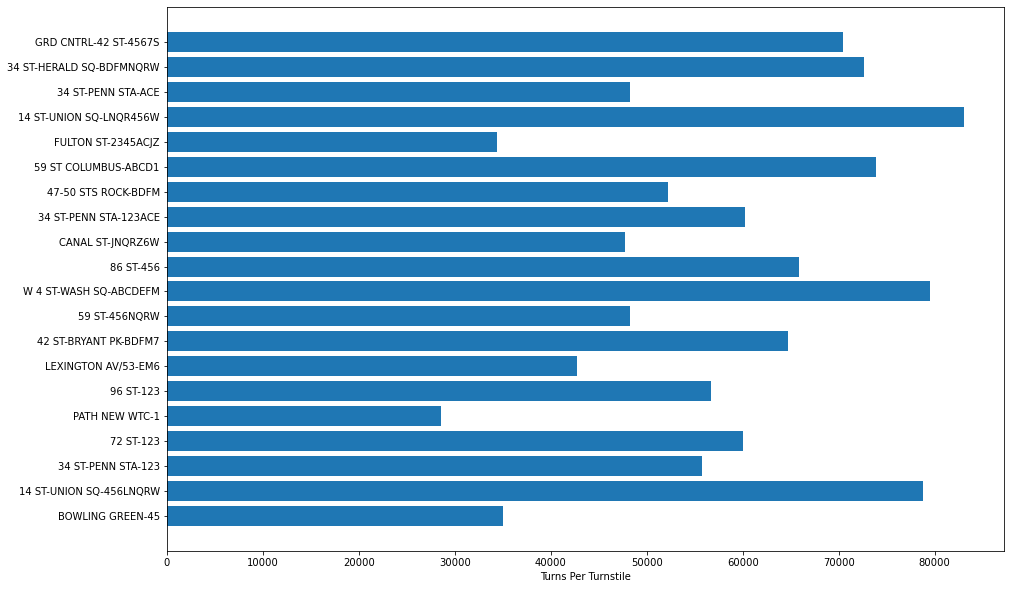

In [80]:
pf.plot_traffic_density(df_full, stations = 20, borough='Manhattan')

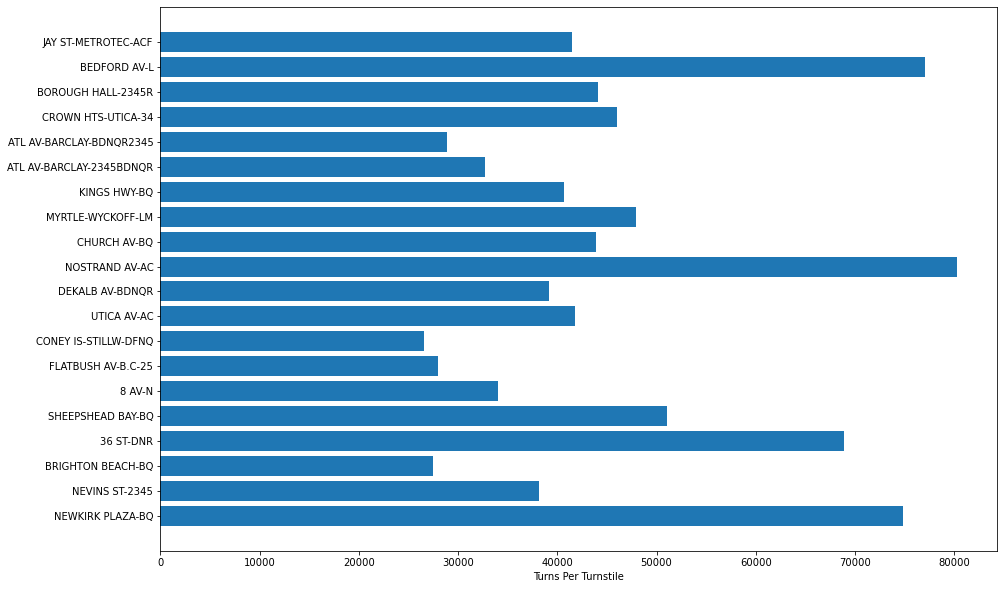

In [81]:
pf.plot_traffic_density(df_full, stations = 20, borough='Brooklyn')

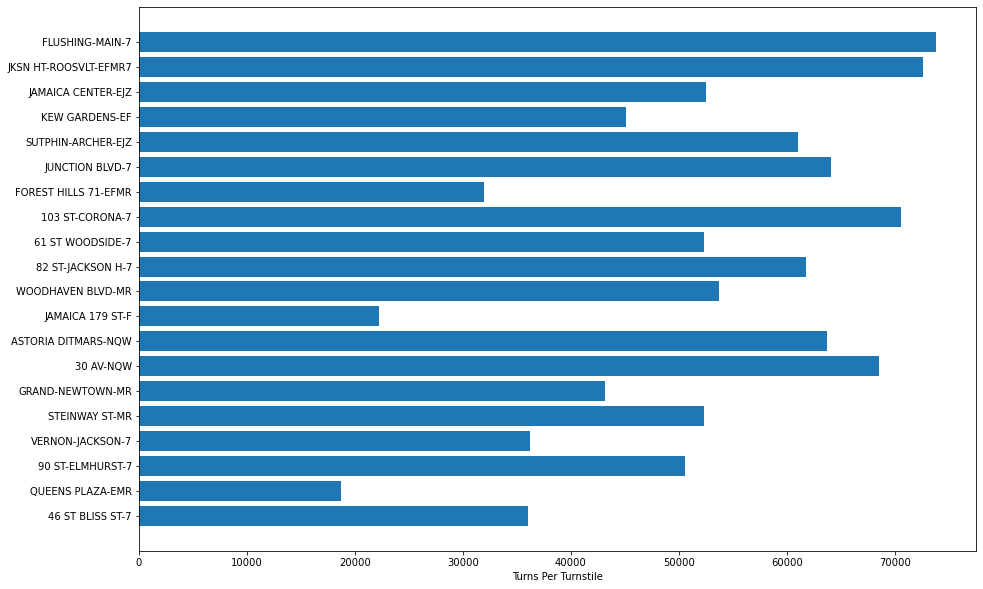

In [82]:
pf.plot_traffic_density(df_full, stations = 20, borough='Queens')

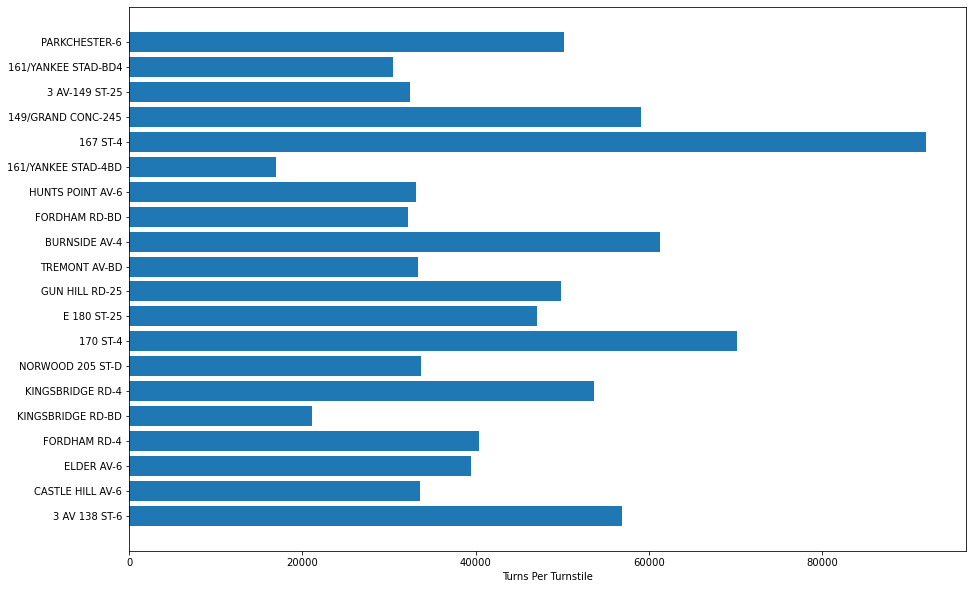

In [83]:
pf.plot_traffic_density(df_full, stations = 20, borough='The Bronx')

In [108]:

def get_weekday(x):
    weekday_key = {0:'1 Mon', 1:'2. Tue', 2:'3. Wed', 3:'4. Thu', 4:'5. Fri', 5:'6. Sat', 6:'7. Sun' }
    return weekday_key[x]
df_full['day_of_week'] = df_full.converted_time.dt.dayofweek.apply(get_weekday)



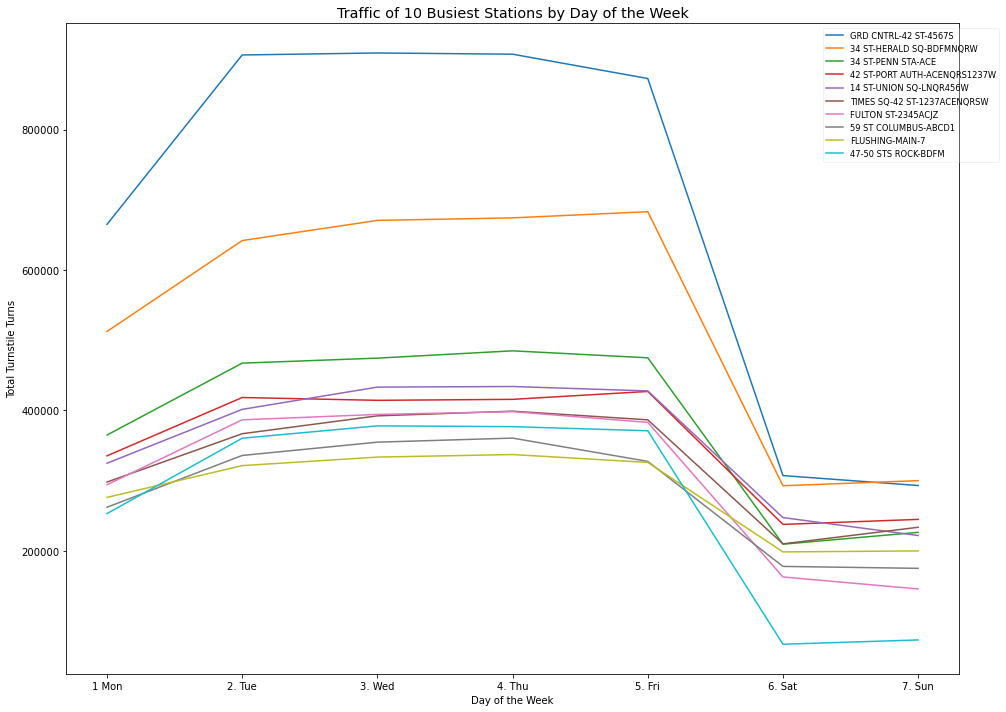

In [109]:

pf.plot_traffic_by_day_of_week(df_full, title='Traffic of 10 Busiest Stations by Day of the Week')

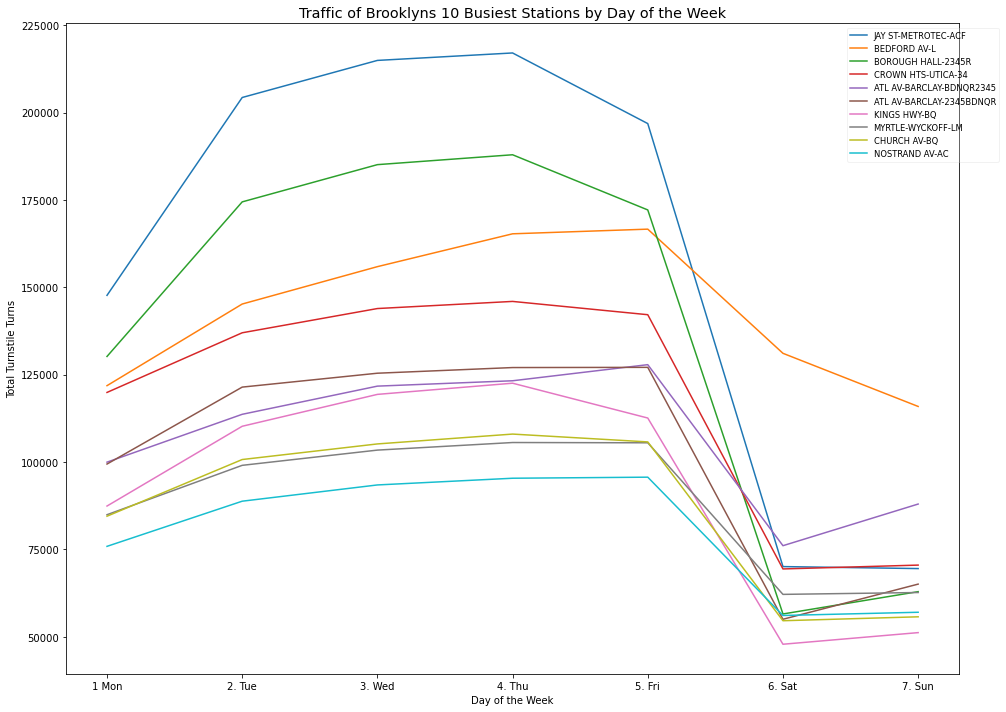

In [110]:
pf.plot_traffic_by_day_of_week(df_full, borough = 'Brooklyn', title='Traffic of Brooklyns 10 Busiest Stations by Day of the Week')                     
                               

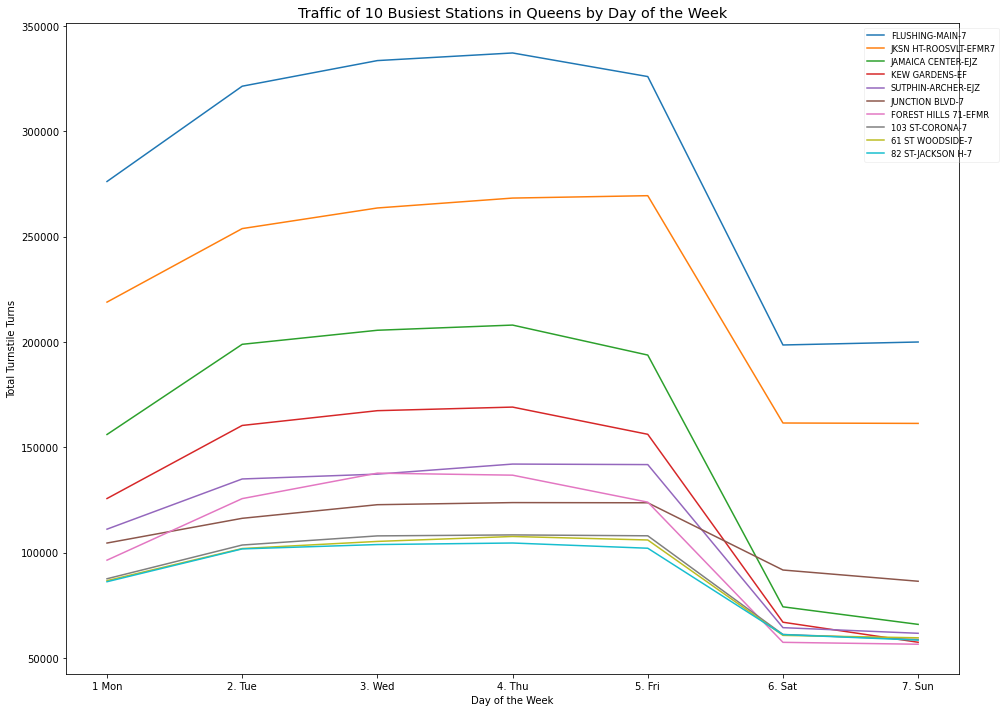

In [111]:
pf.plot_traffic_by_day_of_week(df_full, borough='Queens', title='Traffic of 10 Busiest Stations in Queens by Day of the Week')


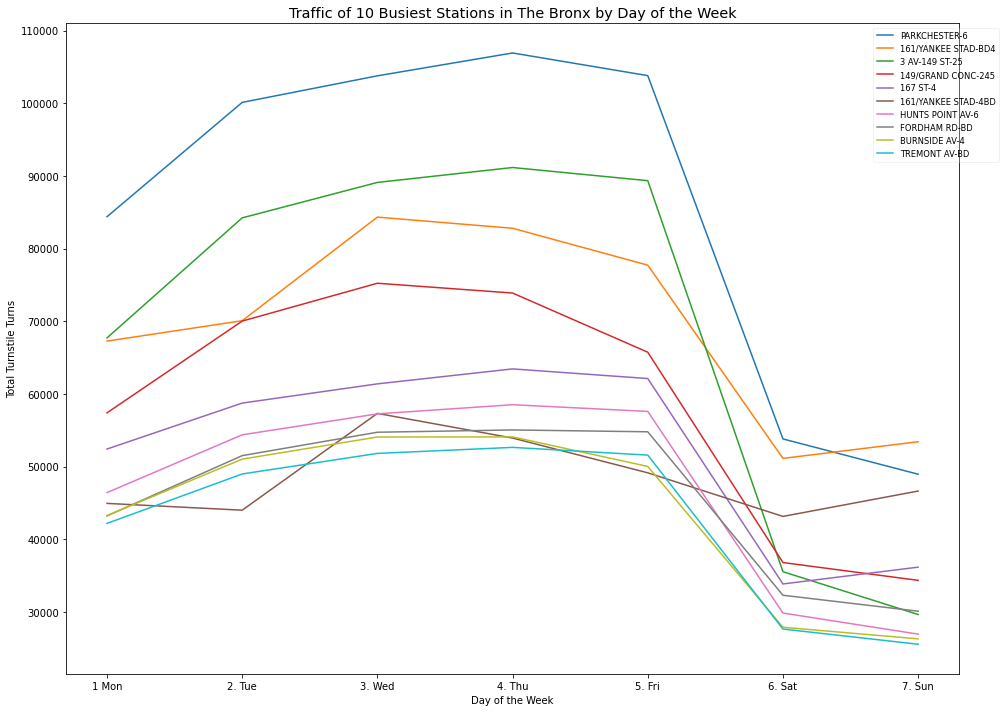

In [112]:
pf.plot_traffic_by_day_of_week(df_full, borough='The Bronx', title='Traffic of 10 Busiest Stations in The Bronx by Day of the Week')


station_unique
GRD CNTRL-42 ST-4567S           4860939.0
34 ST-HERALD SQ-BDFMNQRW        3775315.0
34 ST-PENN STA-ACE              2702757.0
42 ST-PORT AUTH-ACENQRS1237W    2493725.0
14 ST-UNION SQ-LNQR456W         2490910.0
TIMES SQ-42 ST-1237ACENQRSW     2286443.0
FULTON ST-2345ACJZ              2165101.0
59 ST COLUMBUS-ABCD1            1994064.0
FLUSHING-MAIN-7                 1992939.0
47-50 STS ROCK-BDFM             1879848.0
34 ST-PENN STA-123ACE           1626143.0
JKSN HT-ROOSVLT-EFMR7           1596908.0
CANAL ST-JNQRZ6W                1526230.0
86 ST-456                       1514131.0
W 4 ST-WASH SQ-ABCDEFM          1511091.0
59 ST-456NQRW                   1447350.0
42 ST-BRYANT PK-BDFM7           1358618.0
LEXINGTON AV/53-EM6             1326262.0
96 ST-123                       1303126.0
PATH NEW WTC-1                  1287564.0
72 ST-123                       1261068.0
CITY / BUS-1                    1211397.0
34 ST-PENN STA-123              1170144.0
JAY ST-METROTEC-ACF

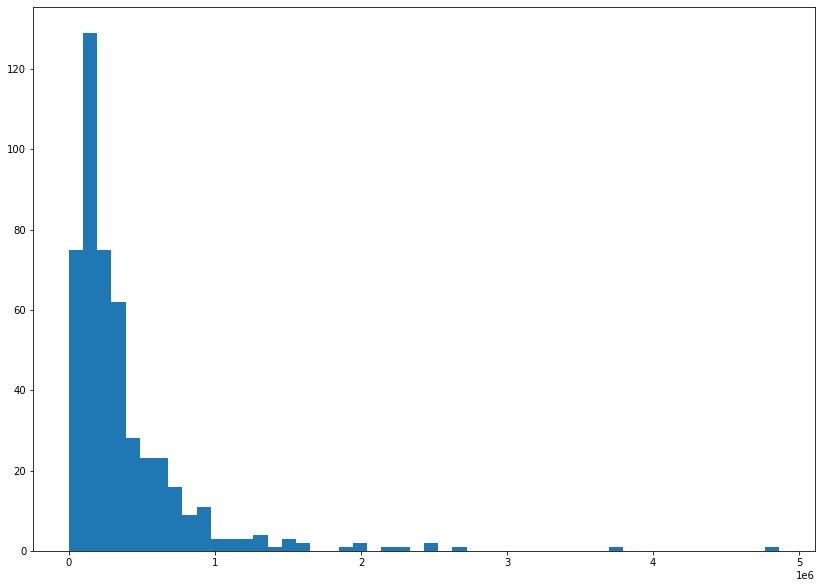

In [113]:
pf.histogram(df_full)
pf.list_busiest(df_full)

In [122]:
for num in range(len(df_full['time_round'])):
    if df_full.loc[num, 'time_round'] == 'Morning: 4am - 12pm':
        df_full.loc[num, 'time_round'] = '1. Morning: 4am - 12pm'
    elif df_full.loc[num, 'time_round'] == 'Afternoon: 12pm - 8pm':
        df_full.loc[num, 'time_round'] = '2. Afternoon: 12pm - 8pm'
    else:
        df_full.loc[num, 'time_round'] = '3. Night: 8pm - 4am'


# pf.plot_traffic_by_time(df_full, borough=False)

/Users/vinnythompson/opt/anaconda3/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

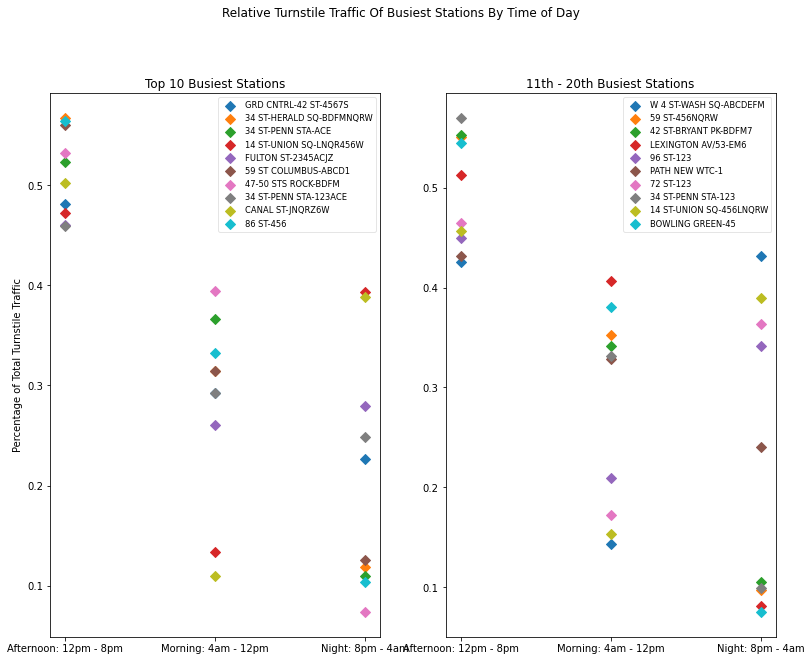

In [97]:
pf.plot_traffic_by_time(df_full, borough='Manhattan')

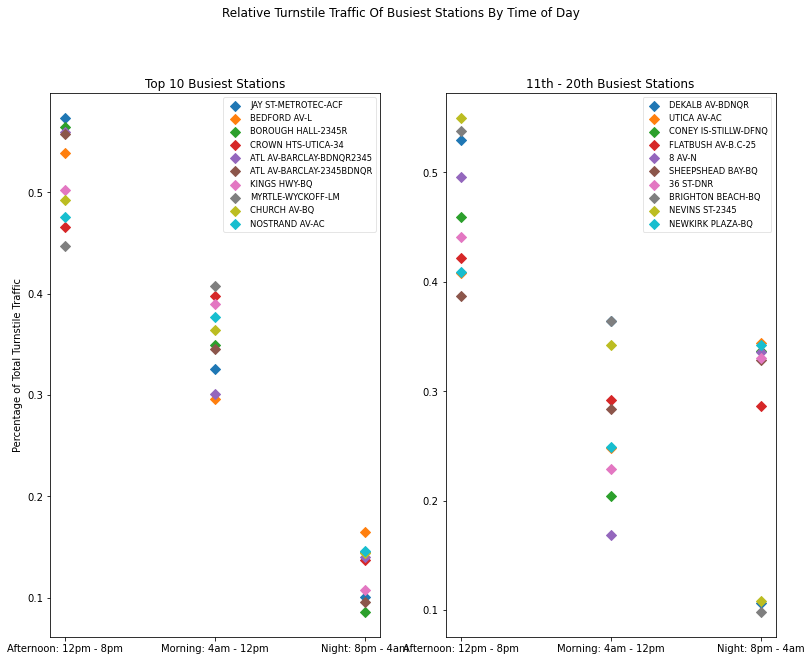

In [114]:
pf.plot_traffic_by_time(df_full, borough='Brooklyn')

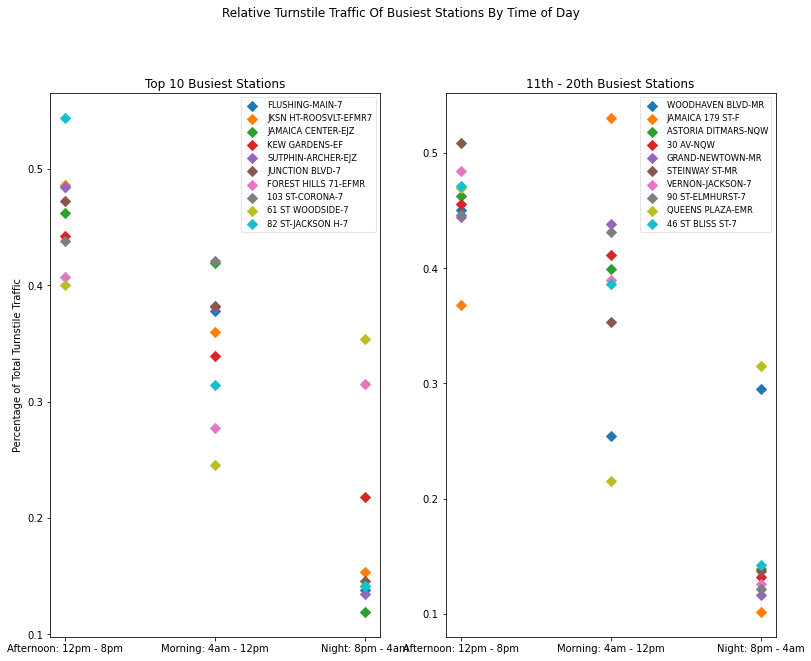

In [115]:
pf.plot_traffic_by_time(df_full, borough='Queens')

In [117]:
df_full.to_csv('final_data.csv', index=False)